In [ ]:
# OS
!cat /etc/issue.net
# CPU 사양
!head /proc/cpuinfo
# 메모리 사양
!head -n 3 /proc/meminfo
# 디스크 사양
!df -h
# 파이썬 버전
!python --version
# GPU 사양
!nvidia-smi

Ubuntu 18.04.3 LTS
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
MemTotal:       13333552 kB
MemFree:         2007048 kB
MemAvailable:    9880772 kB
Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   32G   34G  49% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
tmpfs           6.4G   16K  6.4G   1% /var/colab
/dev/sda1        75G   33G   43G  44% /opt/bin
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  9.3G  5.8G  62% /content/drive
Python 3.6.9
Wed Sep  2 19:16:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 41

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!mkdir /content/PTH/
!mkdir /content/PTH/dataset/

# !unzip /content/drive/My\ Drive/data/train+num.zip -d /content/PTH/dataset/trainset/
!unzip /content/drive/My\ Drive/data/train376.zip -d /content/PTH/dataset/trainset/

# !unzip /content/drive/My\ Drive/data/test.zip -d /content/PTH/dataset/testset/
# !unzip /content/drive/My\ Drive/data/delNoise.zip -d /content/PTH/dataset/delNoise/
# !unzip /content/drive/My\ Drive/data/delNoise1.zip -d /content/PTH/dataset/delNoise1/
# !unzip /content/drive/My\ Drive/data/test2.zip -d /content/PTH/dataset/test2/
!unzip /content/drive/My\ Drive/data/TextCrop3.zip -d /content/PTH/dataset/textCrop3/
!unzip /content/drive/My\ Drive/data/TextCrop4.zip -d /content/PTH/dataset/textCrop4/
!unzip /content/drive/My\ Drive/data/TextCrop5.zip -d /content/PTH/dataset/textCrop5/

mkdir: cannot create directory ‘/content/PTH/’: File exists
mkdir: cannot create directory ‘/content/PTH/dataset/’: File exists
Archive:  /content/drive/My Drive/data/train376.zip
replace /content/PTH/dataset/trainset/0_1.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/drive/My Drive/data/TextCrop3.zip
replace /content/PTH/dataset/textCrop3/crop_300.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/drive/My Drive/data/TextCrop4.zip
replace /content/PTH/dataset/textCrop4/crop_3.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/drive/My Drive/data/TextCrop5.zip
replace /content/PTH/dataset/textCrop5/crop_157.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import tensorflow_addons as tfa

import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
import pathlib
import cv2

print(tf.__version__)
print(tf.test.gpu_device_name())

2.3.0
/device:GPU:0


In [ ]:
data_dir = pathlib.Path("/content/PTH/dataset/trainset")
batch_size = 32
IMG_SIZE = 224

class_names = np.array(sorted(set([item.name.split('_')[0] for item in data_dir.glob('*') if item.name != "LICENSE.txt"])))
print(class_names)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '가' '각' '간' '감' '강' '같' '개' '거'
 '건' '걷' '검' '것' '게' '격' '겪' '결' '경' '계' '고' '공' '과' '관' '광' '괴' '교' '구'
 '국' '군' '권' '귄' '규' '그' '극' '근' '금' '급' '기' '긴' '길' '김' '깊' '까' '께' '꽃'
 '끼' '낄' '나' '난' '날' '남' '납' '내' '너' '넘' '네' '녀' '년' '노' '농' '뉴' '느' '는'
 '늘' '능' '니' '다' '단' '달' '담' '당' '대' '더' '던' '덜' '데' '도' '독' '동' '되' '된'
 '될' '두' '드' '득' '든' '들' '등' '디' '따' '때' '떠' '또' '라' '란' '람' '랑' '래' '량'
 '러' '런' '럽' '레' '려' '력' '련' '령' '로' '록' '론' '료' '루' '류' '르' '른' '를' '름'
 '리' '린' '릴' '립' '마' '만' '많' '말' '망' '매' '맨' '며' '면' '명' '모' '목' '못' '무'
 '문' '물' '미' '민' '및' '바' '박' '반' '받' '발' '방' '배' '백' '버' '번' '범' '법' '변'
 '별' '병' '보' '복' '본' '부' '북' '분' '불' '비' '뽑' '쁘' '사' '산' '살' '삶' '삼' '상'
 '새' '색' '생' '서' '석' '선' '설' '성' '세' '셀' '소' '속' '송' '수' '순' '술' '스' '슴'
 '습' '승' '시' '식' '신' '실' '싫' '심' '십' '싶' '아' '안' '않' '알' '았' '액' '야' '약'
 '양' '어' '억' '언' '업' '없' '었' '에' '엑' '여' '역' '연' '열' '였' '영' '예' '오' '온'
 '올' '와' '완' '왜' '외' '요' '용' '우' '욱' '운' '울' '웃' '워

In [ ]:
list_ds = tf.data.Dataset.list_files(str(data_dir/"*"), shuffle=False)
image_count = tf.data.experimental.cardinality(list_ds).numpy()
list_ds = list_ds.shuffle(image_count)

val_size = int(image_count * 0.3)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

print("총 이미지 개수 : ", image_count)
print("train 이미지 개수 : ", tf.data.experimental.cardinality(train_ds).numpy())
print("validation 이미지 개수 : ", tf.data.experimental.cardinality(val_ds).numpy())

print()

def parse_image(filename):
    parts = tf.strings.split(filename, os.sep)
    label = tf.strings.split(parts[-1], "_")[0]
    one_hot = label == class_names
    label = tf.argmax(one_hot)

    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image, channels=1)
    image = tf.image.convert_image_dtype(image, tf.float32)
    # image = tf.image.random_crop(image, [60, 60, 1])
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])

    image = tf.image.convert_image_dtype(tf.expand_dims(image, 0), tf.dtypes.float32)
    flow_shape = [1, IMG_SIZE, IMG_SIZE, 2]
    init_flows = np.float32(np.random.normal(size=flow_shape) * 0.1)
    image = tfa.image.dense_image_warp(image, init_flows)
    image = tf.squeeze(image, 0)
    
    return image, label

# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

총 이미지 개수 :  34968
train 이미지 개수 :  24478
validation 이미지 개수 :  10490

Image shape:  (224, 224, 1)
Label:  163


In [ ]:
# normalization_layer = layers.experimental.preprocessing.Rescaling(1./255) 
# train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

def configure_for_performance(ds):
#   ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

print("train 이미지 개수 : ", tf.data.experimental.cardinality(train_ds).numpy())
print("validation 이미지 개수 : ", tf.data.experimental.cardinality(val_ds).numpy())

image_batch, label_batch = next(iter(train_ds))
print(image_batch.numpy().shape)

train 이미지 개수 :  765
validation 이미지 개수 :  328
(32, 224, 224, 1)


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51480 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text

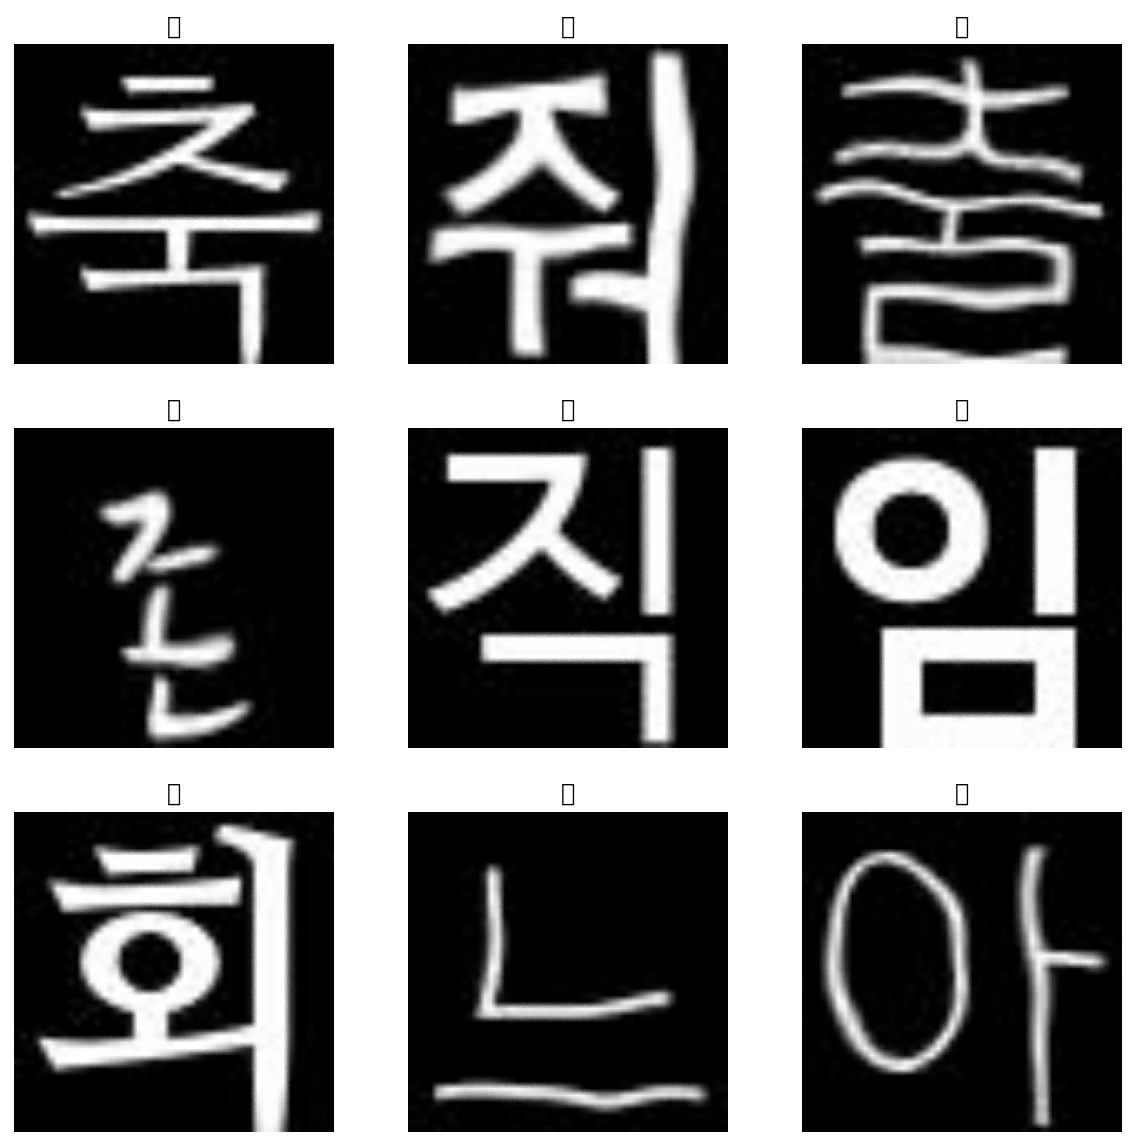

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  temp = tf.image.grayscale_to_rgb(image_batch[i])
  plt.imshow(temp)
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [ ]:
class Model:
    def __init__(self, inputs=IMG_SIZE, fn_classes=len(class_names)):
        self.inputs = keras.Input(shape=(inputs, inputs, 1))
        self.fn_classes = fn_classes
    
    def efficientNetB0(self):
        model = keras.applications.EfficientNetB0(include_top=False, weights=None,
                                                  input_tensor=self.inputs, classes=self.fn_classes, pooling='avg')
        return model

    def efficientNetB3(self):
        model = keras.applications.EfficientNetB3(include_top=False, weights=None, input_tensor=self.inputs, classes=self.fn_classes, pooling='avg')

        return model

    def mobileNetV2(self):
        model = keras.applications.MobileNetV2(input_tensor=self.inputs, include_top=True, weights=None, classes=self.fn_classes, pooling='avg')

        return model

    def inceptionResNetV2(self):
        model = keras.applications.InceptionResNetV2(include_top=True, weights=None, input_tensor=self.inputs, classes=self.fn_classes, pooling='avg')

        return model

    def xCeption(self):
        model = keras.applications.Xception(include_top=True, weights=None, input_tensor=self.inputs, classes=self.fn_classes, pooling='avg')

        return model

In [ ]:
model = keras.Sequential()
model.add(Model().efficientNetB3())
model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dense(2048, activation='relu'))
model.add(keras.layers.Dense(len(class_names), activation='softmax'))

# model = Model().efficientNetB0()
# model = Model().efficientNetB3()
# model = Model().mobileNetV2()
# model = Model().inceptionResNetV2()
# model = Model().xCeption()
# keras.utils.plot_model(model, "model.png", show_shapes=True)
for layer in model.layers:
    layer.trainable = True
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb3 (Functional)  (None, 1536)              10782811  
_________________________________________________________________
dense_6 (Dense)              (None, 4096)              6295552   
_________________________________________________________________
dense_7 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_8 (Dense)              (None, 376)               770424    
Total params: 26,239,443
Trainable params: 26,152,144
Non-trainable params: 87,299
_________________________________________________________________


In [ ]:
hist = model.fit(train_ds ,epochs=10, validation_data=val_ds)

Epoch 1/10
765/765 [==============================] - 482s 630ms/step - loss: 5.3684 - accuracy: 0.0103 - val_loss: 4.9761 - val_accuracy: 0.0258
Epoch 2/10
765/765 [==============================] - 481s 629ms/step - loss: 3.2905 - accuracy: 0.1280 - val_loss: 2.0439 - val_accuracy: 0.3389
Epoch 3/10
765/765 [==============================] - 481s 629ms/step - loss: 1.8126 - accuracy: 0.4147 - val_loss: 1.1313 - val_accuracy: 0.6184
Epoch 4/10
765/765 [==============================] - 480s 628ms/step - loss: 0.8974 - accuracy: 0.7059 - val_loss: 0.4615 - val_accuracy: 0.8445
Epoch 5/10
765/765 [==============================] - 480s 628ms/step - loss: 0.4737 - accuracy: 0.8471 - val_loss: 0.2388 - val_accuracy: 0.9263
Epoch 6/10
765/765 [==============================] - 480s 628ms/step - loss: 0.3158 - accuracy: 0.9023 - val_loss: 0.1362 - val_accuracy: 0.9548
Epoch 7/10
765/765 [==============================] - 479s 626ms/step - loss: 0.2374 - accuracy: 0.9267 - val_loss: 0.0784 -

In [ ]:
model.save("/content/drive/My Drive/data/model376-10v2")

# model1 = keras.models.load_model("/content/drive/My Drive/data/model365+num")

INFO:tensorflow:Assets written to: /content/drive/My Drive/data/model376-10v2/assets


In [ ]:
# model.evaluate(train_ds)

[323 256 208 135  99  51 208  99 167 374 148  34 240 141 374 171 156 188
 156 149  45  29 130 218  76 107 245  36  40 222 222 222 136 136 146 136
 222 222 222 168 140   5   5  31  17 352   5   5 148 206 156 131 206 306
 206 148 341 156 306 131 206 156 306 206 156 148  90 241 308 156  88 206
  88  66  29 103 241  28 240 171 156 188 156 149  45  29 205 218 141 362
 141  70  16 171 324 159 147 325 261 273 240 171  70 324 166 102 136 337
 164 282 240 281 156 159 288 288 267 267 190 190 289 289 226 110 178 328
 236 154  35 135 145  31 154  35  27 180 315 226 178 328  71 271 159 149
 271  80 159 149 152  45  60 136 221 176 235 173 241 263 139 139 147 156
  91 175 179   9 179 240 149   6   6 146 326 147 125  55 328  45 178 205
 205 365 178 365 178  29  29   5 300 146   3  50   1   1   0   3   3  50
   1 123 238 117 158 365  50   1   1   0  50   1 123 169 117 158 365   5
 300   3 164 240 335 365 208  31 158 114 148 164  98 363 183 175  27 188
 348 365 254  38  71 152  45  29  17 156 365   3 15

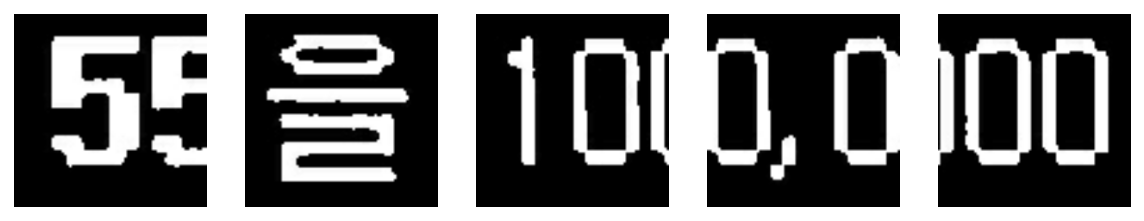

까 아 때 부 훈 

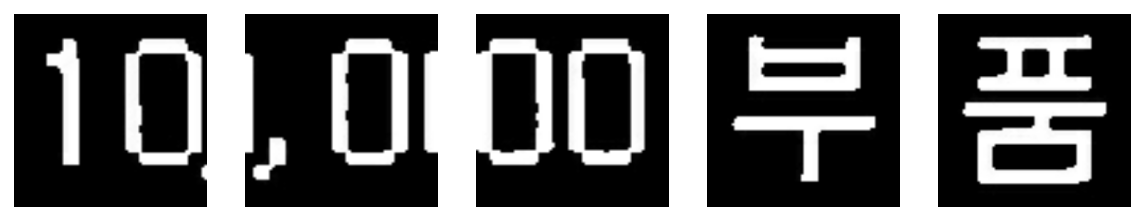

및 교 용 목 훈 

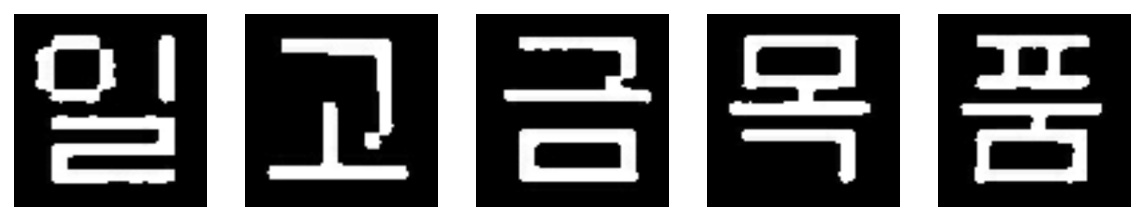

비 백 세 백 바 

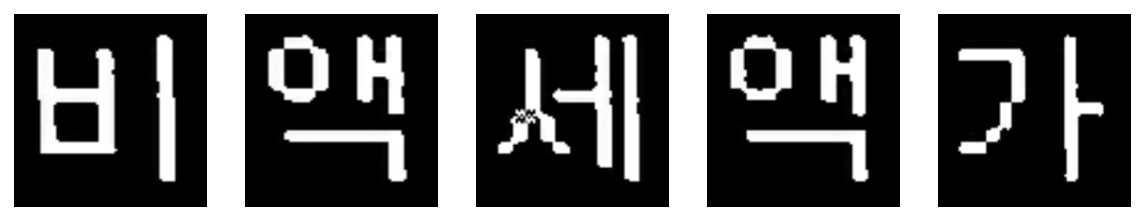

급 공 마 억 단 

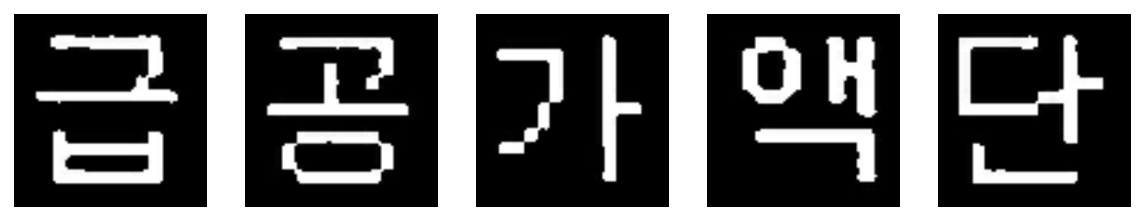

량 웃 국 규 었 

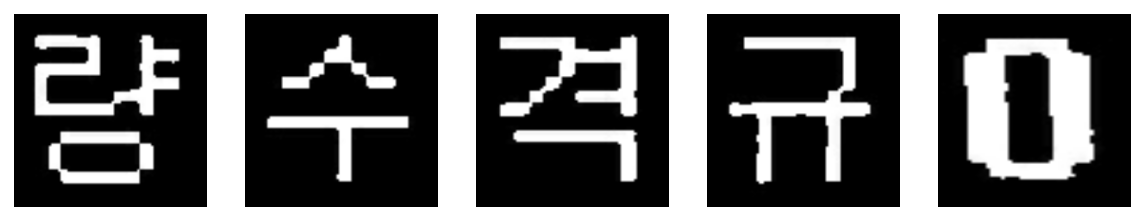

었 었 맨 맨 미 

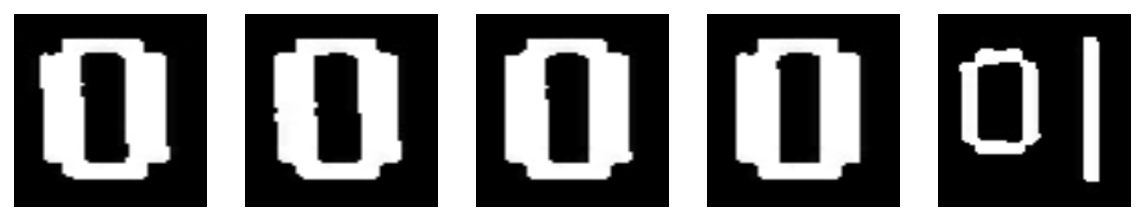

맨 었 었 었 북 

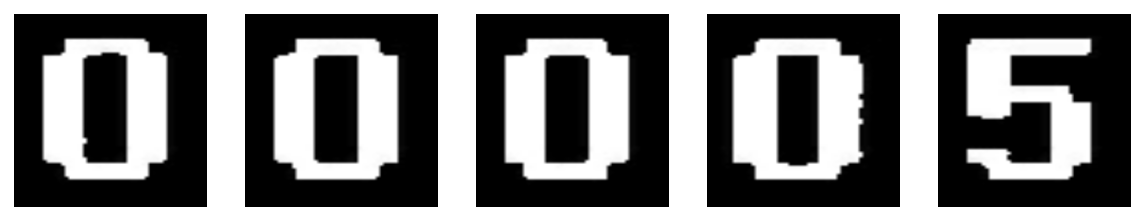

모 5 5 관 거 

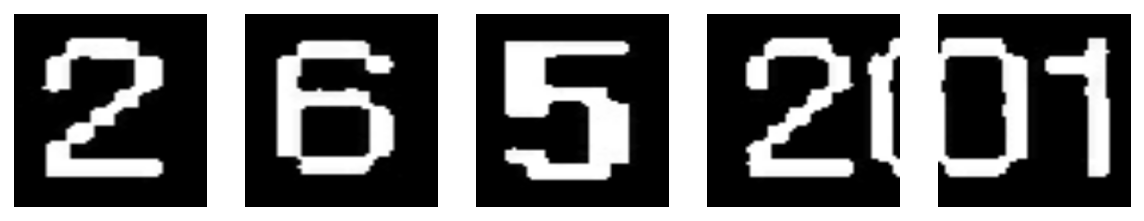

함 5 5 및 십 

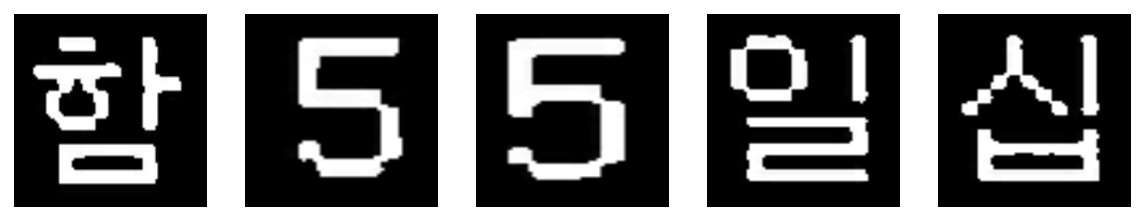

백 만 십 천 십 

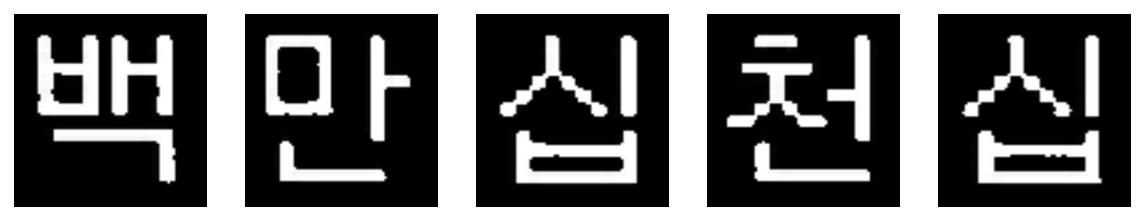

및 표 백 천 만 

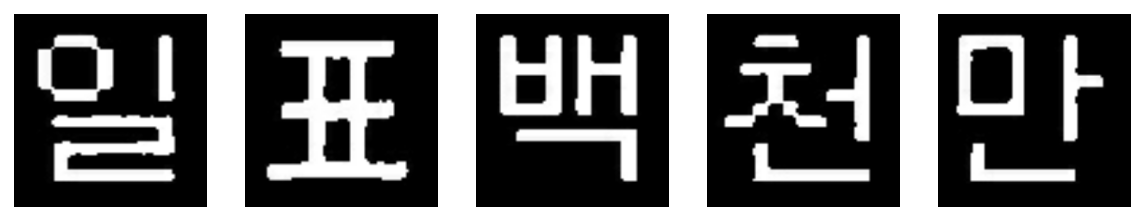

십 백 천 십 백 

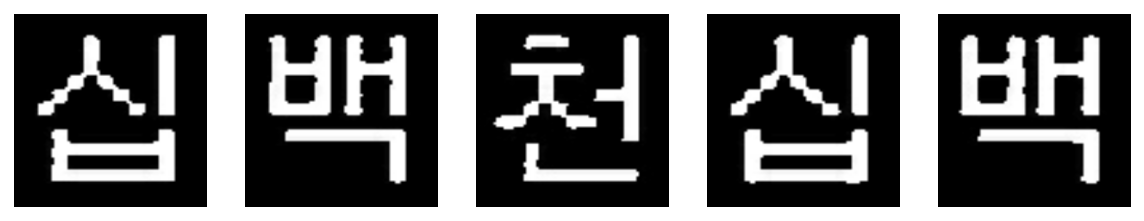

및 될 우 청 백 

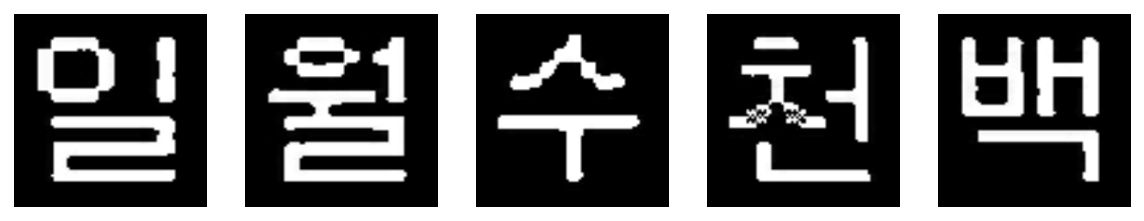

되 십 되 년 공 

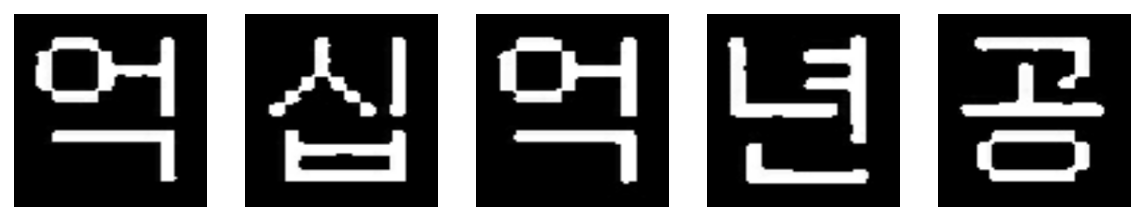

란 우 고 용 비 

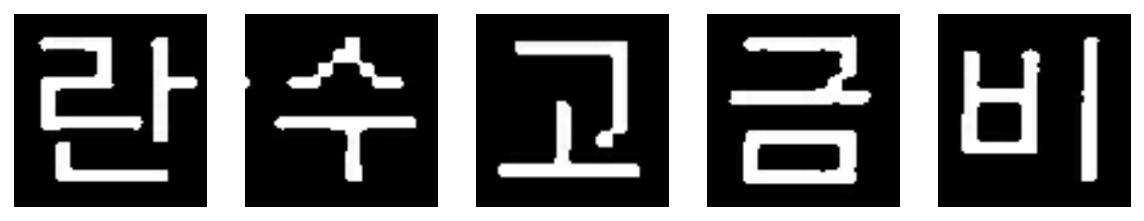

백 세 백 바 급 

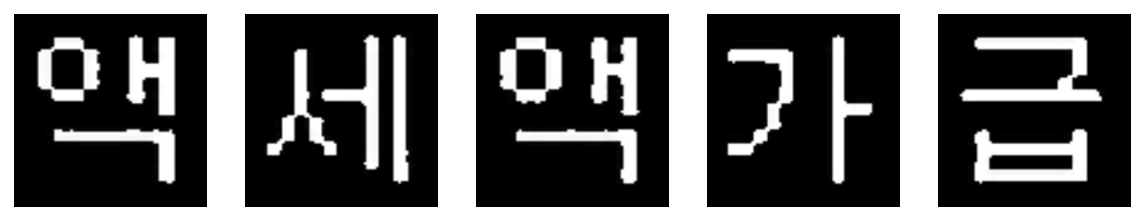

공 심 억 목 현 

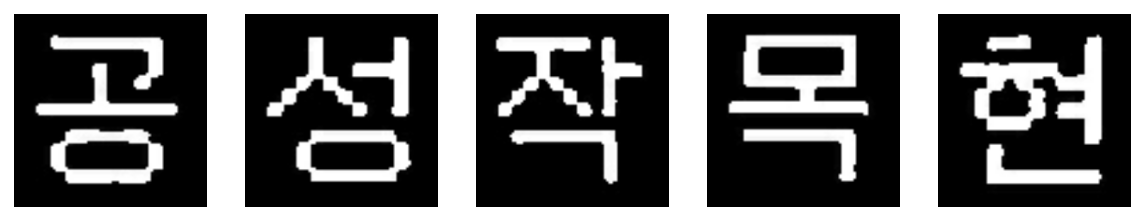

목 느 개 비 태 

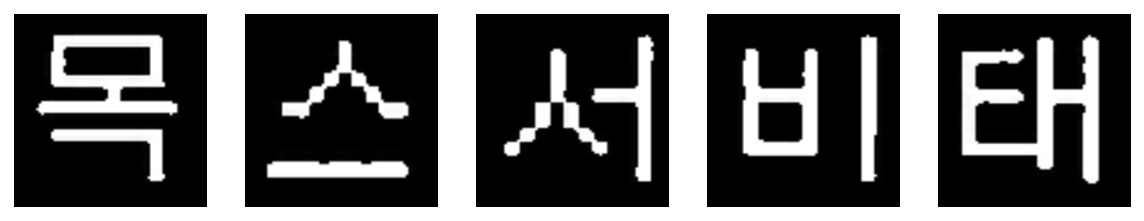

범 민 터 인 재 

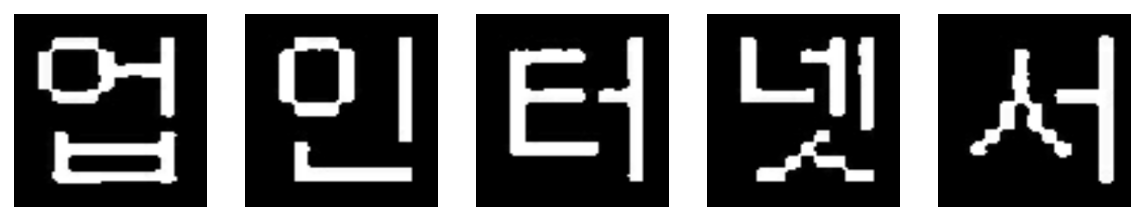

용 비 느 태 본 

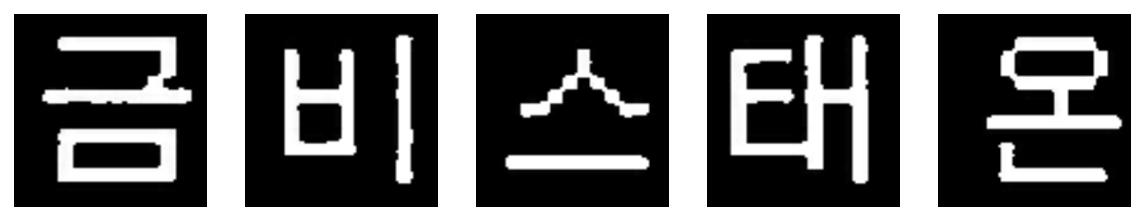

라 맨 펭 보 제 

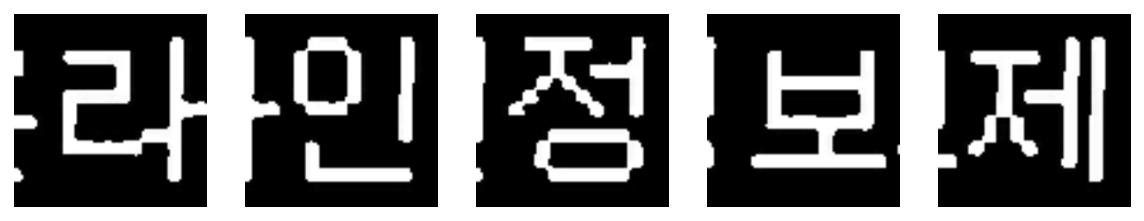

용 정 백 범 종 

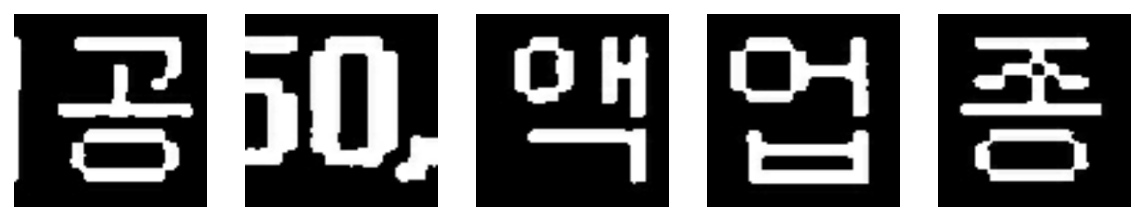

종 자 자 소 소 

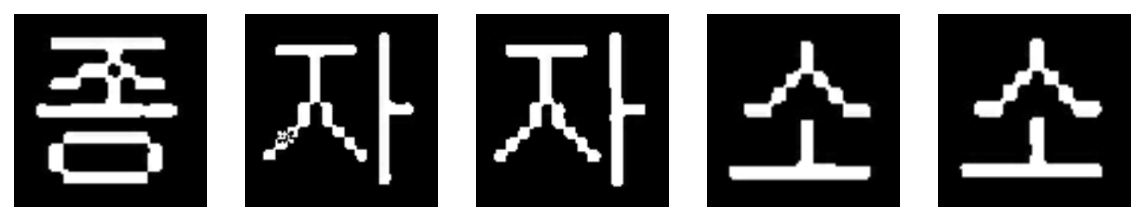

주 주 역 럽 삼 

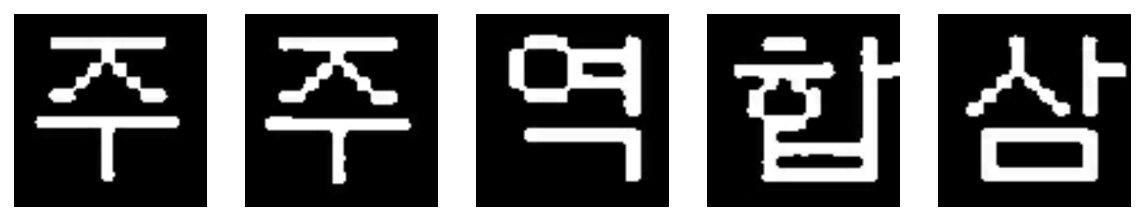

통 완 방 구 매 

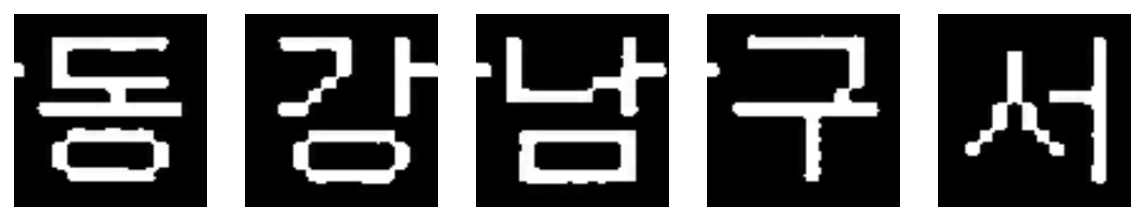

물 관 방 구 계 

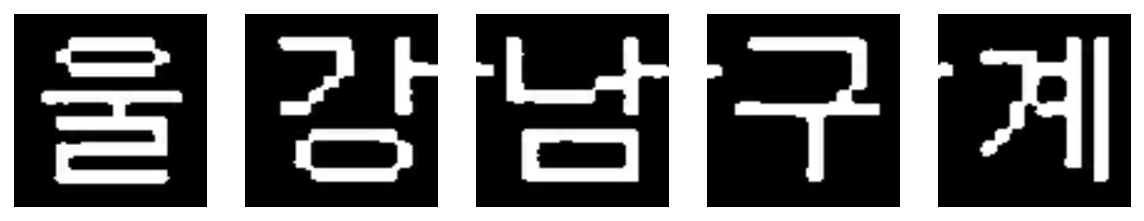

새 출 역 삼 통 

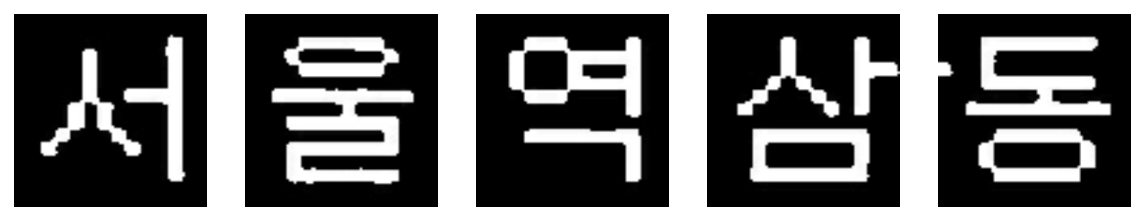

는 잠 범 바 잠 

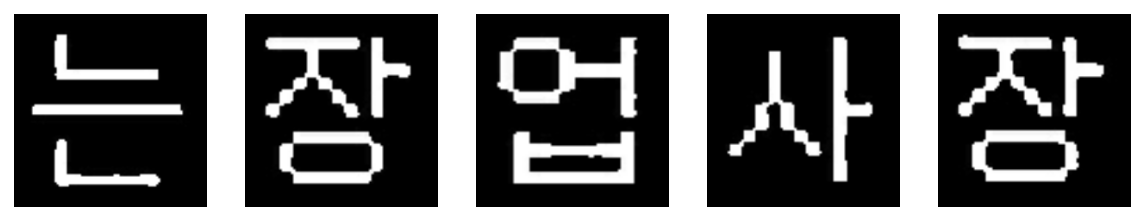

대 범 바 받 급 

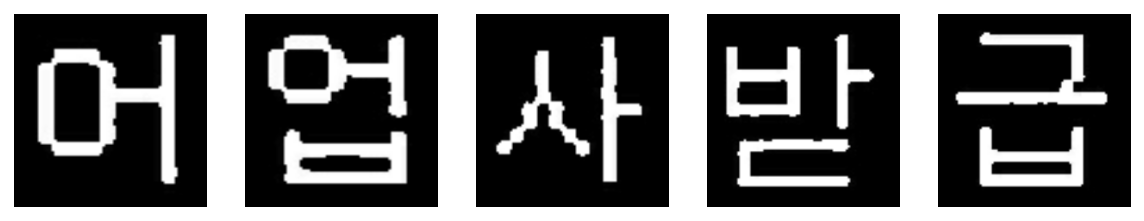

납 맨 없 살 와 

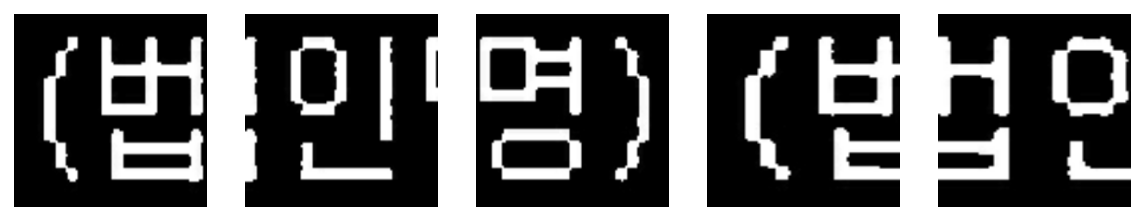

쁘 우 읽 명 명 

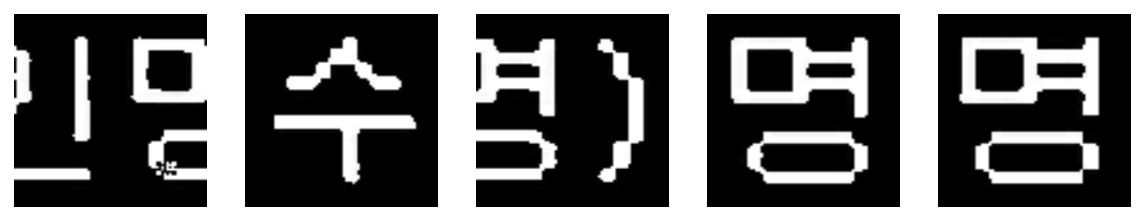

민 백 두 산 상 

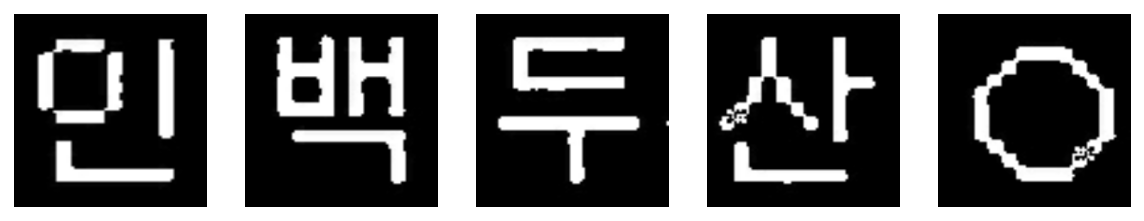

9 상 용 바 6 

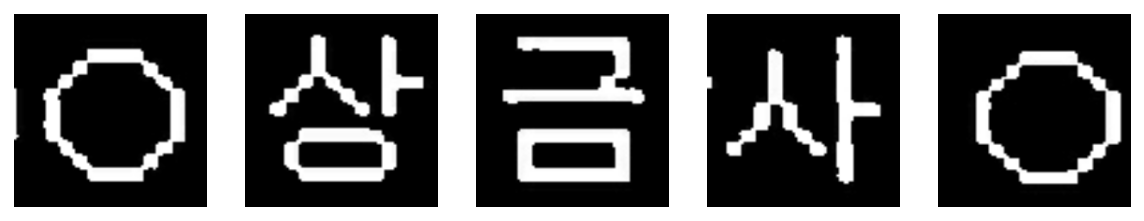

6 미 템 민 름 

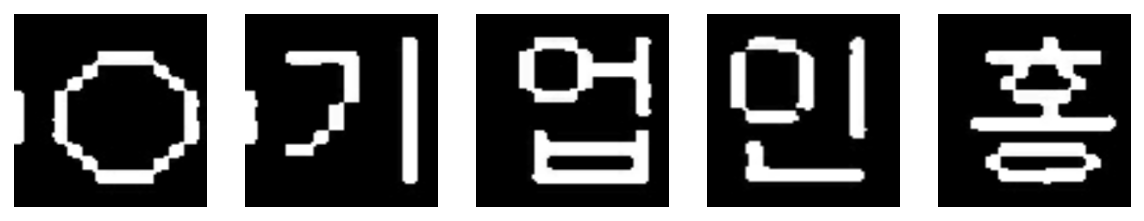

낄 통 급 삼 심 

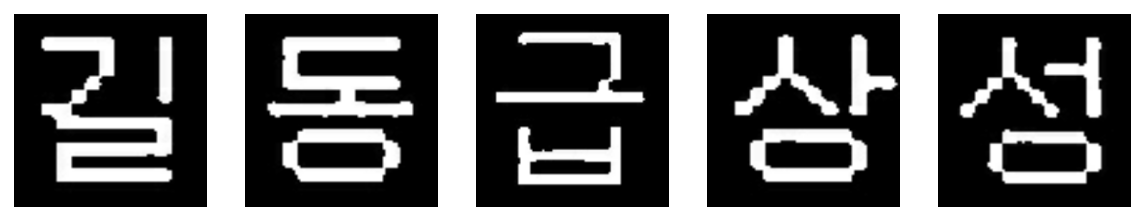

심 호 삼 호 삼 

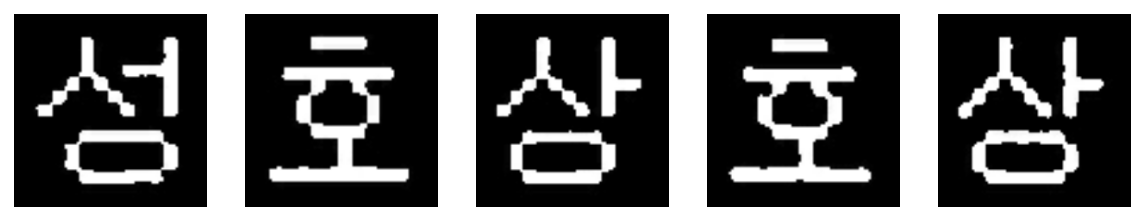

공 공 5 짝 미 

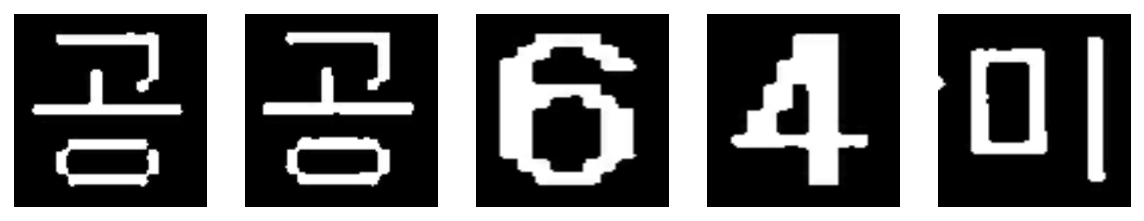

3 깊 1 1 0 

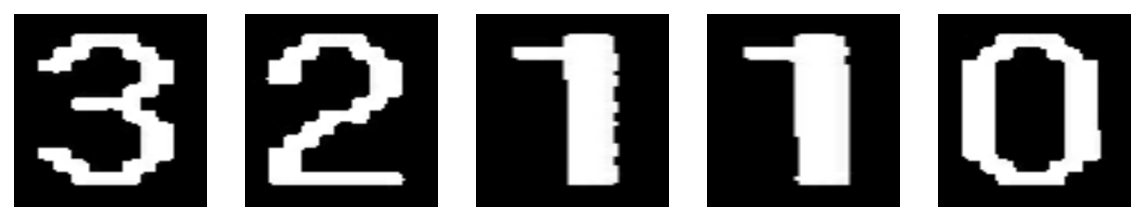

3 3 깊 1 른 

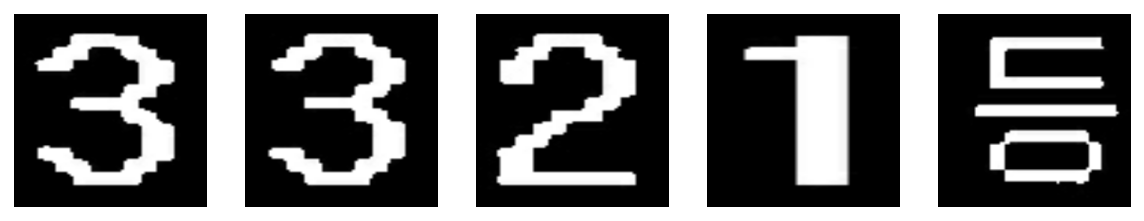

외 록 번 호 깊 

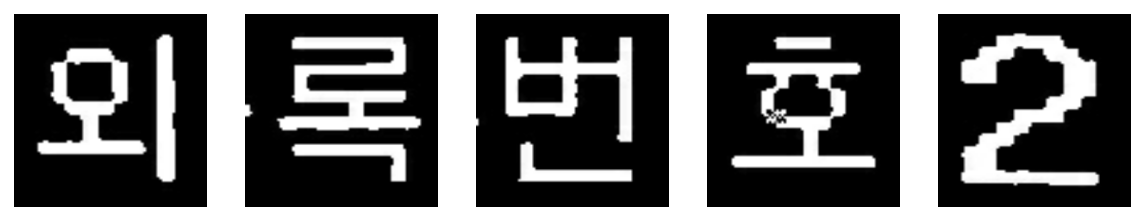

1 1 0 깊 1 

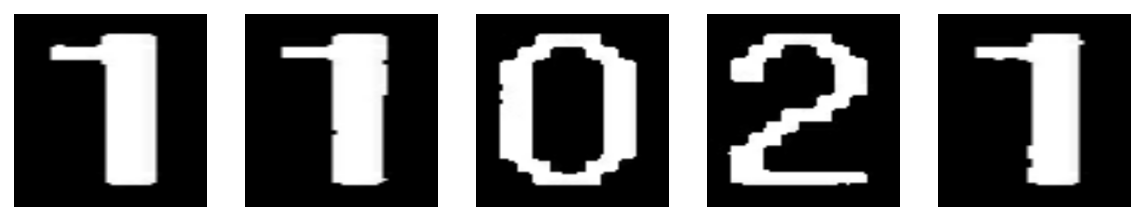

른 분 록 번 호 

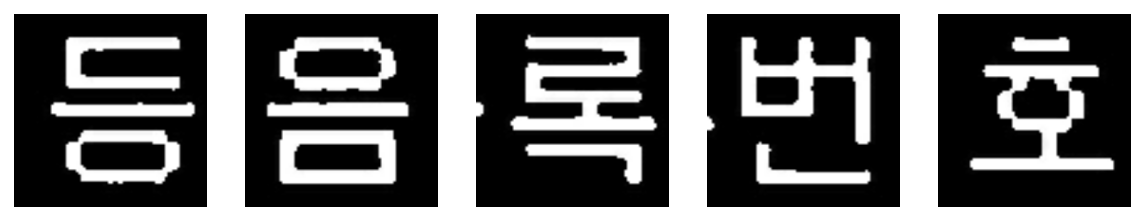

5 짝 3 보 용 

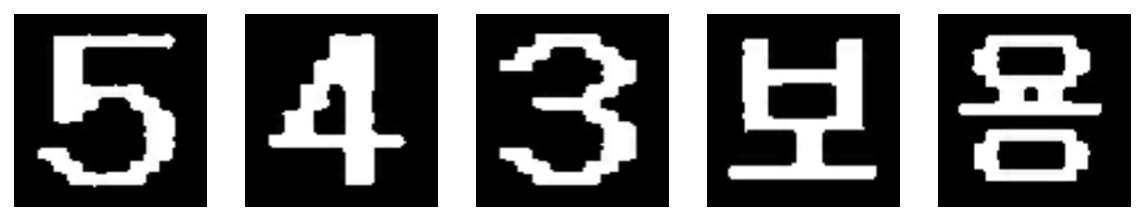

판 호 아 관 번 

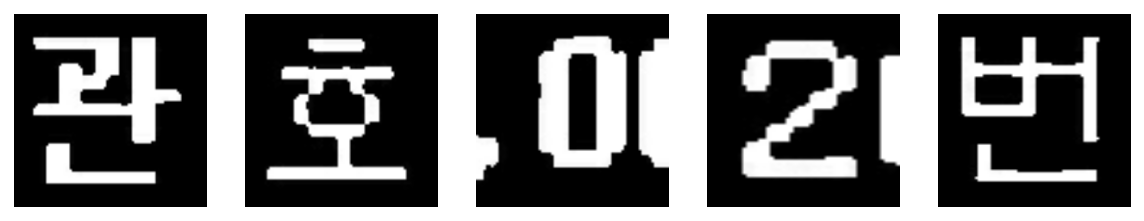

련 및 보 따 협 

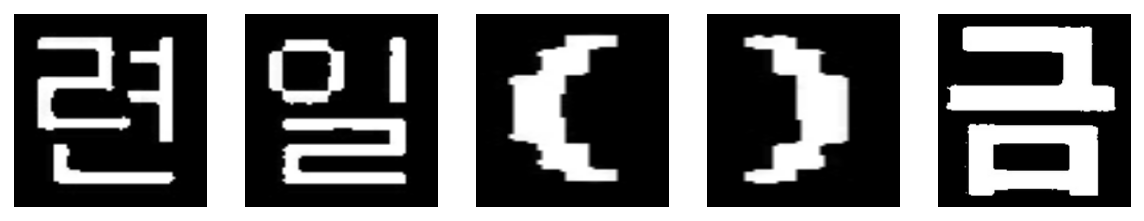

서 산 계 세 하 

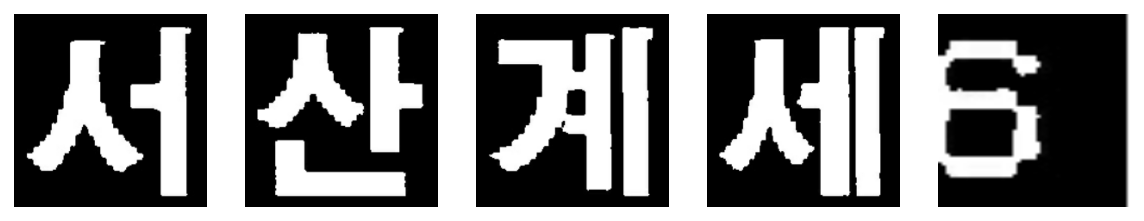

호 으 권 는 받 

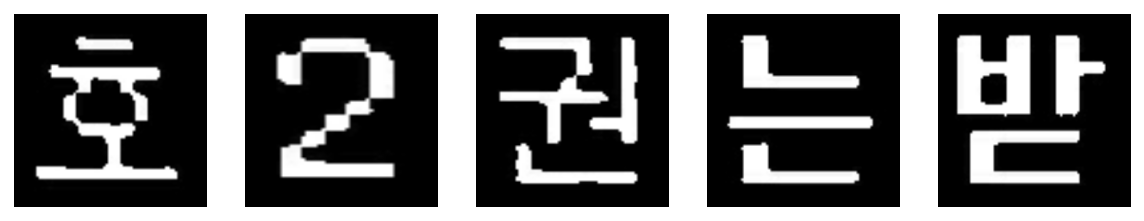

급 공 거 백 호 

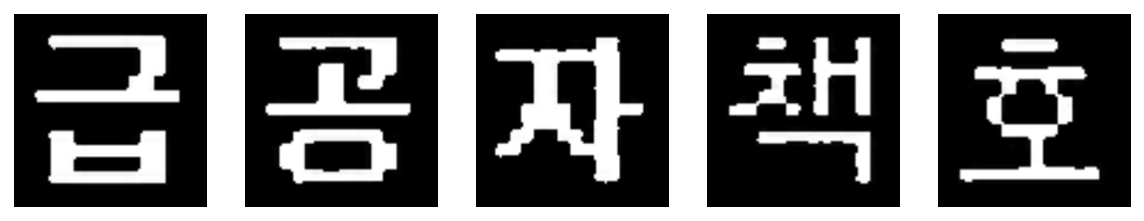

3 번 사 리 와 

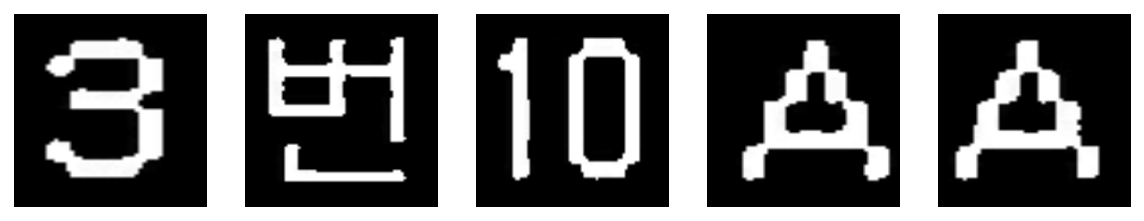

라 아 파 까 께 

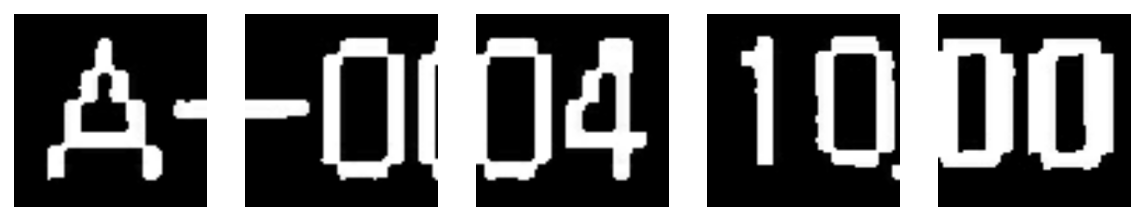

아 때 아 매 때 

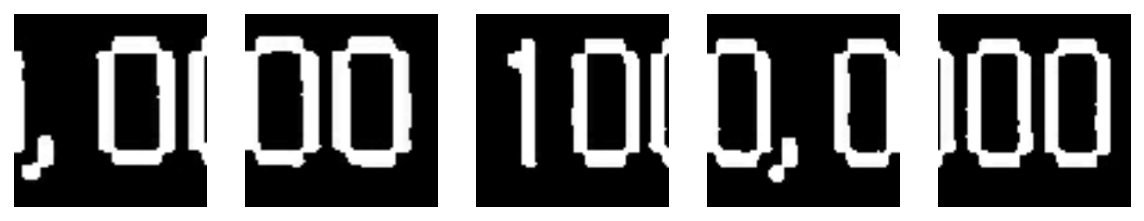

까 아 때 부 훈 

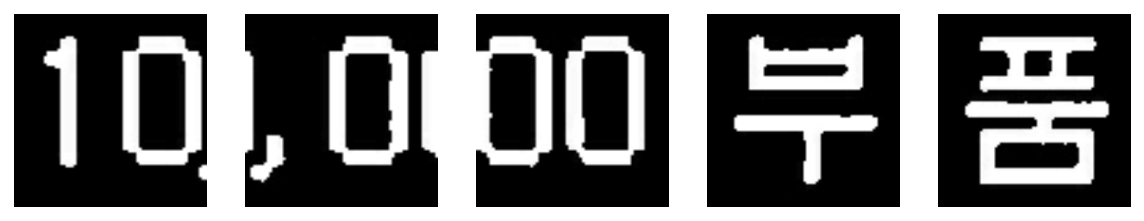

녀 민 하 3 까 

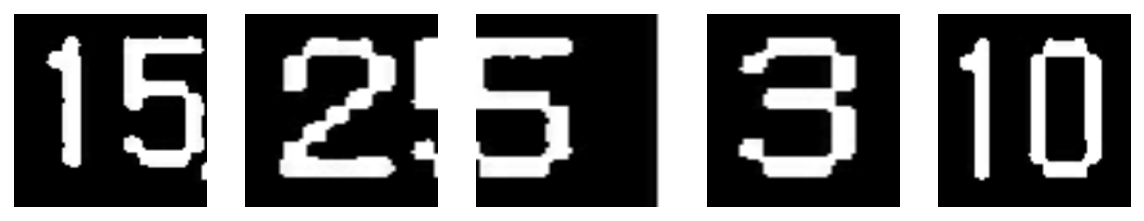

와 와 라 아 3 

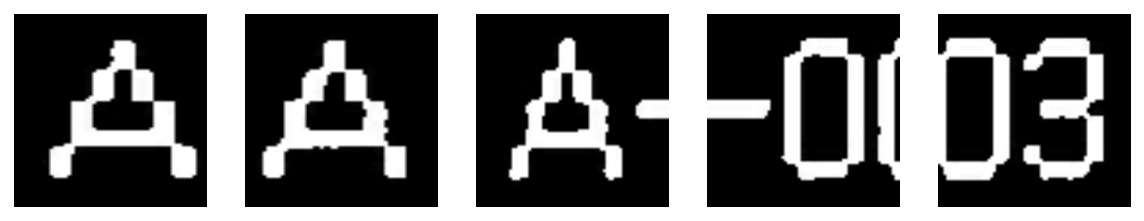

까 아 아 때 아 

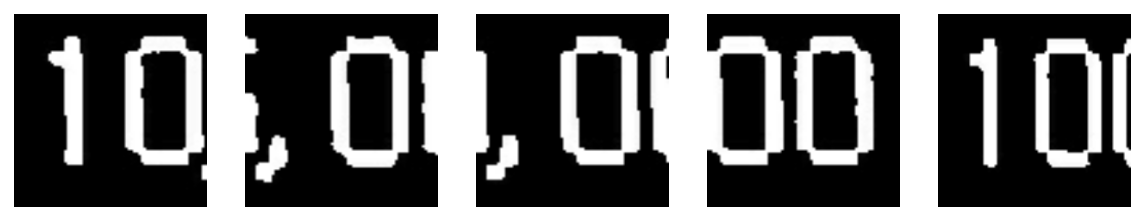

매 때 까 아 때 

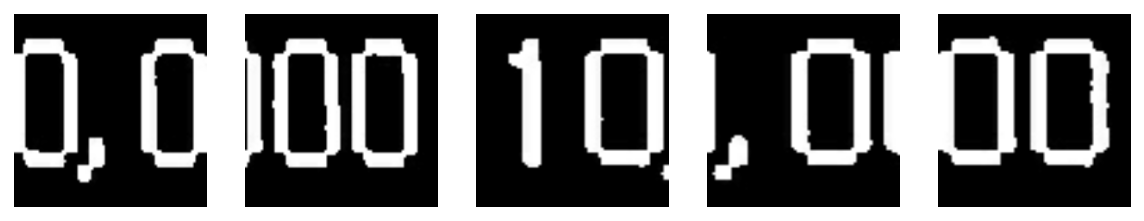

부 훈 때 피 3 

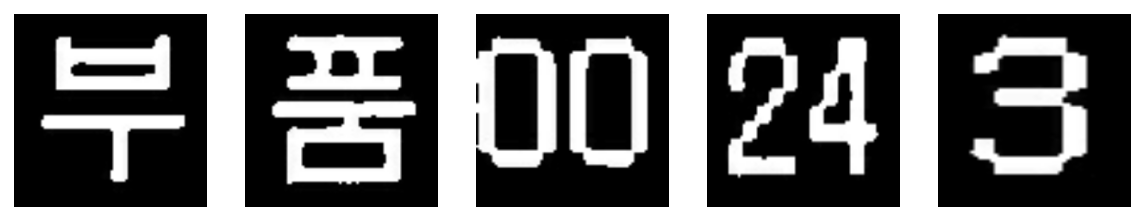

왜 와 짝 라 0 

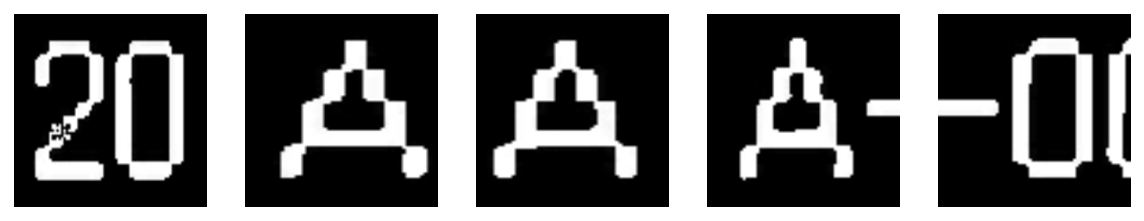

권 9 아 웃 때 

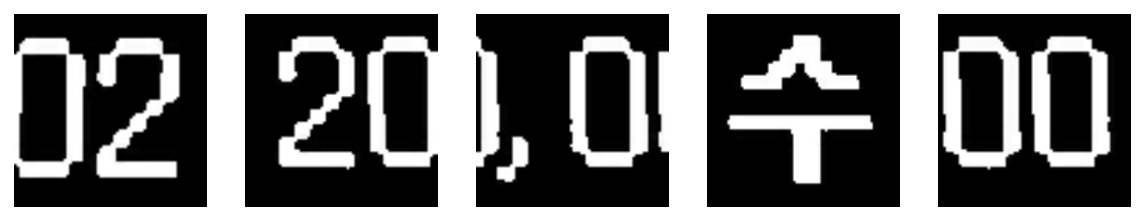

었 마 왜 까 아 

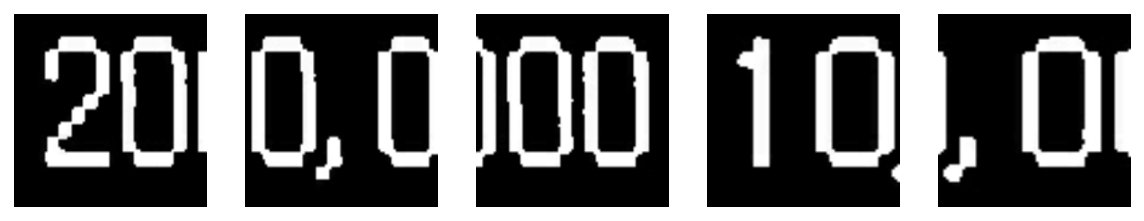

때 부 훈 3 명 

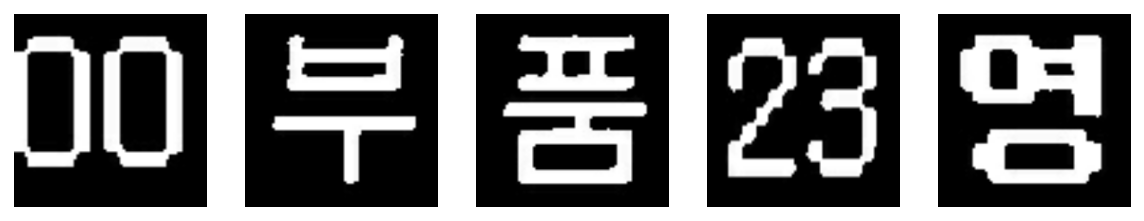

3 0 와 와 라 

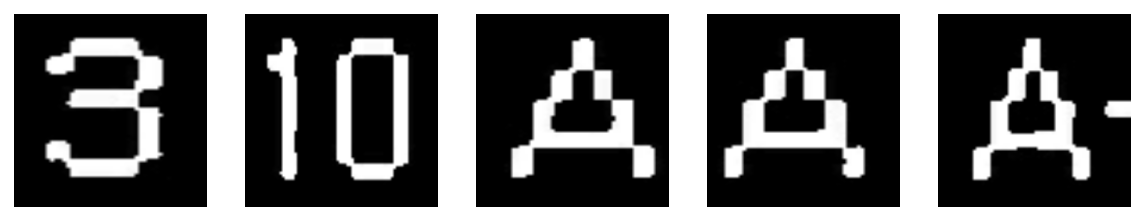

까 어 까 아 때 

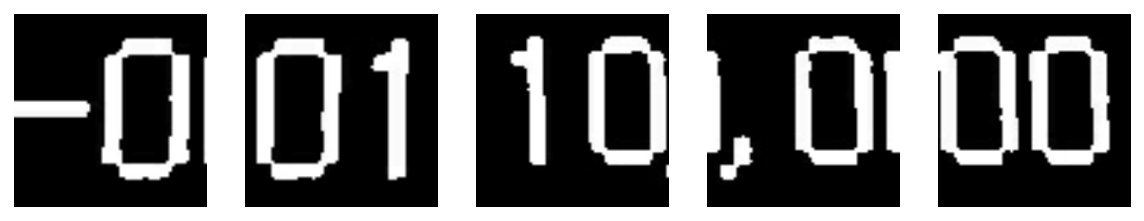

In [ ]:
test_dir = pathlib.Path("/content/PTH/dataset/textCrop5")
test_ds = tf.data.Dataset.list_files(str(test_dir/"*.jpg"), shuffle=False)

# test_ds = list(test_dir.glob('*.jpg'))
test_images = list()
test_labels = list()

def decode_image(filename):
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image, channels=1)
    image = tf.image.convert_image_dtype(image, tf.float32)
    # image = 1 - image
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    
    parts = tf.strings.split(filename, os.sep)
    label = tf.strings.split(parts[-1], ".jpg")[0]

    return image.numpy(), label

for path in test_ds:
    img, label = decode_image(path)
    test_images.append(img)
    test_labels.append(label)


test_images = np.array(test_images)

predictions = model.predict_classes(test_images)

# for prediction, label in zip(predictions, test_labels):
#     print(class_names[prediction], label.numpy())

print(predictions)
print(class_names[predictions])

for j in range(int(len(test_images)/5)):
    plt.figure(figsize=(10, 10))
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        temp = tf.convert_to_tensor(test_images[i+j*5])
        temp = tf.image.grayscale_to_rgb(temp)
        plt.imshow(temp)
        plt.title(print(class_names[predictions[i+j*5]], end=" "))
        plt.axis("off")
    plt.show()